In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import sklearn

c:\Users\Kaitlin Sloan\Documents\DIS Classes\Artificial Neural Networks\miniconda\envs\keras-jax\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
148/148 - 112s - 755ms/step - accuracy: 0.9083 - loss: 0.2182 - val_accuracy: 0.9482 - val_loss: 0.1279
Epoch 2/10
148/148 - 99s - 666ms/step - accuracy: 0.9459 - loss: 0.1350 - val_accuracy: 0.9631 - val_loss: 0.0989
Epoch 3/10
148/148 - 113s - 766ms/step - accuracy: 0.9496 - loss: 0.1229 - val_accuracy: 0.9601 - val_loss: 0.1041
Epoch 4/10
148/148 - 98s - 663ms/step - accuracy: 0.9548 - loss: 0.1119 - val_accuracy: 0.9652 - val_loss: 0.0846
Epoch 5/10
148/148 - 98s - 663ms/step - accuracy: 0.9569 - loss: 0.1089 - val_accuracy: 0.9682 - val_loss: 0.0785
Epoch 6/10
148/148 - 98s - 659ms/step - accuracy: 0.9575 - loss: 0.1069 - val_accuracy: 0.9673 - val_loss: 0.0745
Epoch 7/10
148/148 - 104s - 704ms/step - accuracy: 0.9565 - loss: 0.1055 - val_accuracy: 0.9699 - val_loss: 0.0825
Epoch 8/10
148/148 - 95s - 641ms/step - accuracy: 0.9591 - loss: 0.1017 - val_accuracy: 0.9728 - val_loss: 0.0790
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.9679 - loss: 0.0750
Testing l

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,504,133 (9.55 MB)

 Trainable params: 82,049 (320.50 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 164,100 (641.02 KB)

74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step
Accuracy: 0.9673313534153585


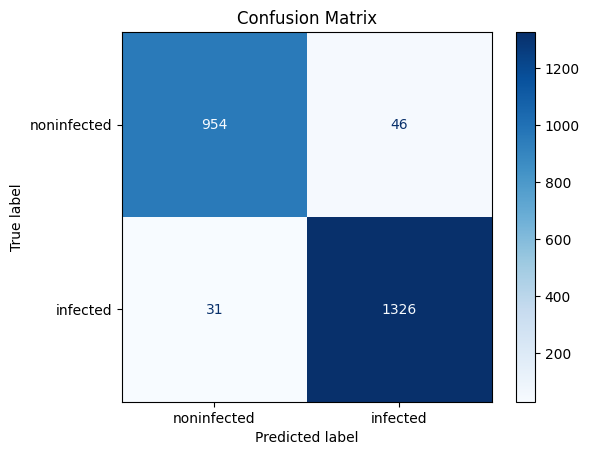


Classification Report:

              precision    recall  f1-score   support

 noninfected       0.97      0.95      0.96      1000
    infected       0.97      0.98      0.97      1357

    accuracy                           0.97      2357
   macro avg       0.97      0.97      0.97      2357
weighted avg       0.97      0.97      0.97      2357



In [8]:

# Reduce image size for speed
target_size = (128, 128)

def load_images_from_folder(folder, label, target_size=target_size):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img)
            images.append(img)
            labels.append(label)
    return images, labels

infected_dir = 'PCOS/infected'
noninfected_dir = 'PCOS/noninfected'

infected_images, infected_labels = load_images_from_folder(infected_dir, 1)
noninfected_images, noninfected_labels = load_images_from_folder(noninfected_dir, 0)

X = np.array(infected_images + noninfected_images)
y = np.array(infected_labels + noninfected_labels)

# Shuffle and split
X, y = sklearn.utils.shuffle(X, y, random_state=42)
X = preprocess_input(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Data augmentation (only on training data)
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)
base_model.trainable = False

# Simpler model, more dropout
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Use a larger batch size for speed
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[callback],
    verbose=2
)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print('Testing loss:', loss)
print('Testing accuracy:', accuracy)
train_acc = history.history['accuracy'][-1]
print('Training accuracy:', train_acc)
model.summary()

# Predict and show confusion matrix and classification report
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['noninfected', 'infected'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_val, y_pred, target_names=['noninfected', 'infected']))